<a href="https://colab.research.google.com/github/WMFrts/agrupamento-clustering/blob/main/agrupamento_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h2> <center> AGRUPAMENTO (CLUSTERING) </center></h2>

<p align="Justify">Clustering é uma técnica de aprendizado não-supervisionado, ou seja, quando não há uma classe associada a cada exemplo. Os exemplos são colocados em clusters (grupos), que normalmente representam algum mecanismo existente no processo do mundo real que gerou os exemplos, fazendo com que alguns sejam mais similares entre si do que aos restantes</p>
<hr size="1" width="100%" align="center" noshade>

<h3><center>1 AGRUPAMENTO COM K-MEANS</center></h3>

<ol align = 'JUSTIFY'>
<li>Primeiramente escolhem-se k centróides, chamados de
sementes ou protótipos, para se inicializar o processo de
partição;</li>
<li>Cada elemento do conjunto de dados é comparado com
cada centróide inicial através da distância desejada
(usualmente Euclidiana). O elemento é alocado ao cluster de
menor distância</li>
<li>Após aplicar o passo 2 para todos os n elementos amostrais,
atualiza-se os valores dos centróides de todos os grupos
formados, e repete-se o passo 2 considerando os centróides
desses novos grupos.</li>
<li>Os passos 2 e 3 são repetidos até que nenhum dos
elementos amostrais seja realocado.</li>
</ol>



**1.1 BIBLIOTECA** 

In [1]:
!pip install plotly --upgrade


In [2]:
import plotly.express as px
import plotly.graph_objs as go   #para concaternar alguns gráficos
import numpy as np
from sklearn.preprocessing import StandardScaler   #padronização


**1.2 BASE IDADE E SALÁRIO**

In [3]:
from sklearn.cluster import  KMeans 

In [4]:
#criação de variaveis
#o objetivo é formar grupos baseados na idade e salário

x = [20, 27, 21, 37, 46, 53, 55, 47, 52, 32, 39, 41, 39, 48, 48]   #idades
y = [1000, 1200, 2900, 1850, 900, 950, 2000, 2100, 3000, 5900, 4100, 5100, 7000, 5000, 6500 ]   #salários

In [5]:
grafico = px.scatter(x = x, y = y)
grafico.show()

In [6]:
#união das duas variáveis 


base_salario = np.array([[20, 1000], [27, 1200], [21, 2900], [37, 1850],[46, 900], [53, 950],[55, 2000],
                        [47, 2010],[52, 3000], [32, 5900], [39, 4100], [41,5100], [39, 7000], [48, 5000], [48, 6500]])



In [7]:
base_salario

array([[  20, 1000],
       [  27, 1200],
       [  21, 2900],
       [  37, 1850],
       [  46,  900],
       [  53,  950],
       [  55, 2000],
       [  47, 2010],
       [  52, 3000],
       [  32, 5900],
       [  39, 4100],
       [  41, 5100],
       [  39, 7000],
       [  48, 5000],
       [  48, 6500]])

In [8]:
#padronização

scaler_salario = StandardScaler()
base_salario = scaler_salario.fit_transform(base_salario)
base_salario

array([[-1.87963884, -1.10929125],
       [-1.23255006, -1.01257885],
       [-1.78719758, -0.19052343],
       [-0.30813751, -0.69826354],
       [ 0.52383377, -1.15764745],
       [ 1.17092255, -1.13346935],
       [ 1.35580506, -0.62572924],
       [ 0.61627503, -0.62089362],
       [ 1.0784813 , -0.14216723],
       [-0.77034379,  1.2601626 ],
       [-0.12325501,  0.38975098],
       [ 0.0616275 ,  0.87331299],
       [-0.12325501,  1.79208081],
       [ 0.70871628,  0.82495679],
       [ 0.70871628,  1.5502998 ]])

In [9]:
kmeans_salario = KMeans(n_clusters = 3 )
kmeans_salario.fit(base_salario)   #treinamento

KMeans(n_clusters=3)

In [10]:
#centroides com os dados escalonados

centroides = kmeans_salario.cluster_centers_
centroides

array([[-1.63312883, -0.77079784],
       [ 0.07703438,  1.11509399],
       [ 0.73953003, -0.72969507]])

In [11]:
#centroides com os dados reais
#cada centroide representa a média dos registros que fazem parte daquele grupo

scaler_salario.inverse_transform(kmeans_salario.cluster_centers_)

array([[  22.66666667, 1700.        ],
       [  41.16666667, 5600.        ],
       [  48.33333333, 1785.        ]])

In [12]:
#rótulos

rotulos = kmeans_salario.labels_
rotulos

array([0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1], dtype=int32)

In [13]:
grafico1 = px.scatter(x= base_salario[:, 0], y= base_salario[:, 1], color= rotulos)
grafico1.show()

In [14]:
#com a impressão dos centroides, no meio do grupo, pois é a media deste

grafico1 = px.scatter(x= base_salario[:, 0], y= base_salario[:, 1], color= rotulos)
grafico2 = px.scatter(x= centroides[:, 0], y= centroides[:, 1], size=[12, 12, 12])
grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3.show()

**1.3 TESTE RANDÔMICO**

In [15]:
#para geração de dados aleatórios

from sklearn.datasets import make_blobs

In [16]:
#n_samples = 200 (quantidade de números aleatórios), ligado a x_random
#centers= 5 (quantidade de clusters), ligado a y_random

x_random, y_random = make_blobs(n_samples = 200, centers= 5, random_state= 1)

In [17]:
grafico = px.scatter(x= x_random[:, 0], y = x_random[:, 1])
grafico.show()

In [18]:
#criação do K-means para agrupar os dados

kmeans_blobs = KMeans(n_clusters = 5)
kmeans_blobs.fit(x_random)   #treinamento

KMeans(n_clusters=5)

In [19]:
#buscar os rótulos:

rotulos = kmeans_blobs.labels_
rotulos

array([0, 2, 1, 2, 2, 1, 4, 1, 2, 0, 1, 1, 1, 3, 1, 0, 0, 3, 2, 2, 0, 1,
       4, 1, 4, 3, 2, 4, 4, 3, 2, 4, 0, 1, 2, 0, 3, 2, 3, 0, 3, 3, 4, 4,
       2, 4, 3, 1, 2, 4, 0, 1, 1, 0, 1, 3, 0, 1, 2, 2, 3, 1, 1, 1, 2, 4,
       0, 3, 4, 2, 3, 4, 2, 4, 4, 3, 2, 3, 0, 4, 3, 3, 1, 2, 1, 0, 2, 2,
       2, 3, 4, 1, 0, 4, 1, 3, 4, 0, 2, 3, 0, 2, 4, 3, 4, 2, 3, 2, 1, 0,
       1, 1, 2, 3, 1, 0, 3, 4, 0, 0, 2, 3, 3, 1, 0, 3, 2, 4, 2, 4, 0, 4,
       1, 1, 3, 3, 1, 0, 0, 1, 1, 1, 0, 0, 4, 2, 4, 0, 2, 1, 4, 1, 0, 4,
       1, 3, 3, 3, 0, 2, 4, 0, 3, 0, 4, 3, 3, 3, 1, 4, 3, 4, 4, 1, 0, 2,
       4, 1, 2, 0, 2, 0, 0, 2, 3, 4, 3, 0, 0, 1, 2, 4, 0, 3, 3, 4, 1, 4,
       2, 3], dtype=int32)

In [20]:
#também para buscar os rótulos:

rotulos = kmeans_blobs.predict(x_random)
rotulos

array([0, 2, 1, 2, 2, 1, 4, 1, 2, 0, 1, 1, 1, 3, 1, 0, 0, 3, 2, 2, 0, 1,
       4, 1, 4, 3, 2, 4, 4, 3, 2, 4, 0, 1, 2, 0, 3, 2, 3, 0, 3, 3, 4, 4,
       2, 4, 3, 1, 2, 4, 0, 1, 1, 0, 1, 3, 0, 1, 2, 2, 3, 1, 1, 1, 2, 4,
       0, 3, 4, 2, 3, 4, 2, 4, 4, 3, 2, 3, 0, 4, 3, 3, 1, 2, 1, 0, 2, 2,
       2, 3, 4, 1, 0, 4, 1, 3, 4, 0, 2, 3, 0, 2, 4, 3, 4, 2, 3, 2, 1, 0,
       1, 1, 2, 3, 1, 0, 3, 4, 0, 0, 2, 3, 3, 1, 0, 3, 2, 4, 2, 4, 0, 4,
       1, 1, 3, 3, 1, 0, 0, 1, 1, 1, 0, 0, 4, 2, 4, 0, 2, 1, 4, 1, 0, 4,
       1, 3, 3, 3, 0, 2, 4, 0, 3, 0, 4, 3, 3, 3, 1, 4, 3, 4, 4, 1, 0, 2,
       4, 1, 2, 0, 2, 0, 0, 2, 3, 4, 3, 0, 0, 1, 2, 4, 0, 3, 3, 4, 1, 4,
       2, 3], dtype=int32)

In [21]:
centroides = kmeans_blobs.cluster_centers_
centroides

array([[-1.58338528,  4.50520457],
       [-5.90368078, -3.04489641],
       [-6.87958999, -8.11648104],
       [-9.85620522, -3.91021738],
       [-2.17069756,  1.02591979]])

In [22]:
grafico1 = px.scatter(x=x_random[:, 0], y = x_random[:,1], color = rotulos)

grafico3 = go.Figure(data = grafico1.data)
grafico3.show()


In [23]:
#com centroide

grafico1 = px.scatter(x=x_random[:, 0], y = x_random[:,1], color = rotulos)
grafico2 = px.scatter(x = centroides[:, 0], y = centroides[:,1], size = [5, 5, 5, 5, 5])
grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3.show()



**1.4 BASE CARTÃO DE CRÉDITO**
<p align = 'JUSTIFY'> Baseado no histórico de pagamento do cartão de crédito em um tempo de seis meses, o objetivo é descobrir se a pessoa poderá pagar a próxima fatura

In [24]:
import pandas as pd
base_cartao = pd.read_csv('/content/credit_card_clients.csv')

In [25]:
base_cartao

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [26]:
#há cabeçalho no arquivo, para separar corretamente:

base_cartao = pd.read_csv('/content/credit_card_clients.csv', header = 1)

In [27]:
#são 3000 clientes

base_cartao

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [28]:
base_cartao.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [29]:
#o valor total que o cliente está devendo

base_cartao['BILL_TOTAL'] = base_cartao['BILL_AMT1'] + base_cartao['BILL_AMT2'] + base_cartao['BILL_AMT3'] + base_cartao['BILL_AMT4']+ base_cartao['BILL_AMT5']+ base_cartao['BILL_AMT6']

In [30]:
base_cartao

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,725349
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,21182
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,70496
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,266611


In [31]:
#criação da variável para ter o valor do limite e do total da dívida

x_cartao = base_cartao.iloc[:, [1, 25]].values
x_cartao

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]], dtype=int64)

In [33]:
#escalonamento dos dados

scaler_cartao = StandardScaler()
x_cartao = scaler_cartao.fit_transform(x_cartao)

In [34]:
x_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [35]:
#escolha do cluster

WCSS = []

for i in range (1, 11):
  kmeans_cartao = KMeans(n_clusters= i, random_state = 0)
  kmeans_cartao.fit(x_cartao)
  WCSS.append(kmeans_cartao.inertia_)

In [36]:
WCSS

[59999.99999999978,
 35196.57080583435,
 20128.132558347686,
 14943.809173865899,
 10707.537016753624,
 8603.395384848965,
 7400.069599689482,
 6353.473303353463,
 5665.823857740179,
 5052.188166408734]

In [37]:
#gráfico para visualizar o cluster mais adequado

#de 4 para 5 clusters a queda foi menos acentuada que nos demais, então estas serão as possibilidades

grafico = px.line(x=range(1, 11), y= WCSS)
grafico.show()

In [38]:
kmeans_cartao = KMeans(n_clusters= 4, random_state= 0)
rotulos = kmeans_cartao.fit_predict(x_cartao)  #faz o treinamento e já obtém os resultados

In [39]:
#no eixo x está o valor do limite, quanto mais para direita, maior o limite do cartão
#no eixo y está os gastos, BILL_TOTAL. Quanto maior, mais a pessoa gasta no cartão

grafico = px.scatter(x= x_cartao[:, 0], y = x_cartao[:, 1], color = rotulos)
grafico.show()

In [40]:
#insights:

#grupo 0: pessoas que gastam pouco e tem baixo limite de cartão (gastariam mais se o limite fosse aumentado?)
#grupo 1: gastam pouco e tem grande limite de cartão (formular algum atrativo para promover maior consumo com o cartão?)
#grupo 2: gasto médio e limite médio (seria viável aumentar o limite?)
#grupo 3: gasto alto e limite alto (haveria maior gasto se o limite tivesse mais aumento?)

#lista de clientes por grupos:

lista_clientes = np.column_stack((base_cartao, rotulos))
lista_clientes



array([[     1,  20000,      2, ...,      1,   7704,      0],
       [     2, 120000,      2, ...,      1,  17077,      0],
       [     3,  90000,      2, ...,      0, 101653,      0],
       ...,
       [ 29998,  30000,      1, ...,      1,  70496,      0],
       [ 29999,  80000,      1, ...,      1, 266611,      0],
       [ 30000,  50000,      1, ...,      1, 230874,      0]], dtype=int64)

In [41]:
#para odenar os grupos:

lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [ 16789,  30000,      1, ...,      1,  14274,      0],
       [ 16788,  30000,      1, ...,      1,  90453,      0],
       ...,
       [ 20882, 110000,      1, ...,      0, 554308,      3],
       [ 20744, 220000,      1, ...,      0, 452961,      3],
       [ 20270, 150000,      2, ...,      0, 546939,      3]], dtype=int64)

In [42]:
#interação com mais atributos:

x_cartao_mais = base_cartao.iloc[:,[1, 2, 3, 4, 5, 25]].values
x_cartao_mais

array([[ 20000,      2,      2,      1,     24,   7704],
       [120000,      2,      2,      2,     26,  17077],
       [ 90000,      2,      2,      2,     34, 101653],
       ...,
       [ 30000,      1,      2,      2,     37,  70496],
       [ 80000,      1,      3,      1,     41, 266611],
       [ 50000,      1,      2,      1,     46, 230874]], dtype=int64)

In [43]:
#para identificar [1, 2, 3, 4, 5, 25]
#'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_TOTAL'
base_cartao.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'BILL_TOTAL'],
      dtype='object')

In [44]:
#padronização

scaler_cartao_mais = StandardScaler()
x_cartao_mais = scaler_cartao.fit_transform(x_cartao_mais)

In [45]:
x_cartao_mais

array([[-1.13672015,  0.81016074,  0.18582826, -1.05729503, -1.24601985,
        -0.69069198],
       [-0.3659805 ,  0.81016074,  0.18582826,  0.85855728, -1.02904717,
        -0.66599747],
       [-0.59720239,  0.81016074,  0.18582826,  0.85855728, -0.16115646,
        -0.44316987],
       ...,
       [-1.05964618, -1.23432296,  0.18582826,  0.85855728,  0.16430256,
        -0.52525745],
       [-0.67427636, -1.23432296,  1.45111372, -1.05729503,  0.59824792,
        -0.00856436],
       [-0.90549825, -1.23432296,  0.18582826, -1.05729503,  1.14067961,
        -0.10271861]])

In [46]:
#escolha do cluster

WCSS = []

for i in range (1, 11):
  kmeans_cartao_mais = KMeans(n_clusters= i, random_state = 0)
  kmeans_cartao_mais.fit(x_cartao_mais)
  WCSS.append(kmeans_cartao_mais.inertia_)

In [47]:
#gráfico para visualizar o cluster mais adequado

#de 4 para 5 clusters a queda foi menos acentuada que nos demais, então estas serão as possibilidades

grafico = px.line(x=range(1, 11), y= WCSS)
grafico.show()

In [48]:
kmeans_cartao_mais = KMeans(n_clusters= 4, random_state= 0)
rotulos = kmeans_cartao_mais.fit_predict(x_cartao_mais)

In [49]:
rotulos

array([1, 0, 0, ..., 3, 1, 1], dtype=int32)

In [50]:
#Principal component analysis (PCA)
#PCA para reduzir a dimensionalidade, pois 6 atributos estão sendo analizados

from sklearn.decomposition import PCA 

In [51]:
pca = PCA(n_components= 2)   #quantos atributos serão gerados
x_cartao_mais_pca = pca.fit_transform(x_cartao_mais)   #passado x_cartao_mais com seus 6 atributos

In [52]:
x_cartao_mais_pca.shape

(30000, 2)

In [53]:
#agrupamento com a combinação 

grafico = px.scatter(x= x_cartao_mais_pca[:, 0], y = x_cartao_mais_pca[:, 1], color = rotulos)
grafico.show()

In [54]:
#com cluster = 2

kmeans_cartao_mais = KMeans(n_clusters= 2, random_state= 0)
rotulos = kmeans_cartao_mais.fit_predict(x_cartao_mais)

In [55]:
from sklearn.decomposition import PCA 

In [56]:
pca = PCA(n_components= 2)   
x_cartao_mais_pca = pca.fit_transform(x_cartao_mais) 

In [57]:
grafico = px.scatter(x= x_cartao_mais_pca[:, 0], y = x_cartao_mais_pca[:, 1], color = rotulos)
grafico.show()

In [58]:
lista_clientes = np.column_stack((base_cartao, rotulos))
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]

In [59]:
#lista para combinar os resultados e informar
#a qual grupo cadas cliente pertence

lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [ 16671,  20000,      1, ...,      0,  20753,      0],
       [ 16669,  60000,      1, ...,      0, 334495,      0],
       ...,
       [  6249, 390000,      1, ...,      0, 393330,      1],
       [ 17363,  50000,      2, ...,      0,  53295,      1],
       [ 15000,  50000,      1, ...,      0, 249711,      1]], dtype=int64)

<h3><center>2 AGRUPAMENTO HIERÁRQUICO</center></h3>


<p align = "JUSTIFY" >Na mineração de dados e estatística, o agrupamento hierárquico (também chamado de análise hierárquica de cluster ou HCA ) é um método de análise de cluster que procura construir uma hierarquia de clusters. É formada uma estrutura em forma de árvore que indica o número de cluster e os resultados podem ser apresentados em um dendrograma 


 As estratégias para agrupamento hierárquico geralmente se enquadram em dois tipos:   

<ol align = 'JUSTIFY'>
<li>Agglomerative : Esta é uma abordagem “de baixo para cima “: cada observação começa em seu próprio cluster, e pares de clusters são mesclados à medida que se sobe na hierarquia.</li>

<li>Divisivo : Essa é uma abordagem “de cima para baixo “: todas as observações iniciam em um cluster e as divisões são executadas recursivamente à medida que se desce a hierarquia.</li>
</ol>

In [ ]:
# base padronizada

base_salario

In [60]:
#importações para formação do dentrograma

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

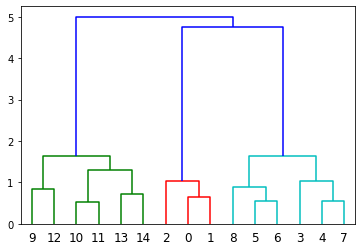

In [61]:
dendrograma = dendrogram(linkage(base_salario, method= 'ward')) #ward é o método padrão

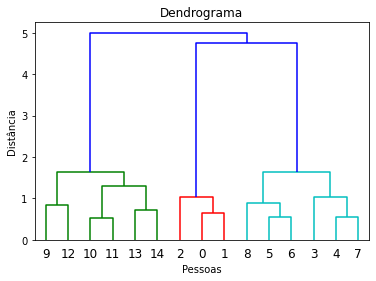

In [63]:
#com personalização

dendrograma = dendrogram(linkage(base_salario, method= 'ward'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância');